In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 98% 160M/163M [00:01<00:00, 179MB/s]
100% 163M/163M [00:01<00:00, 127MB/s]


In [4]:
# extractinig the compressed images

from zipfile import ZipFile

dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset,"r") as zip :
  zip.extractall()
  print("the dataset has been extracted".title())

The Dataset Has Been Extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [6]:
# import the dependencies

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir("/content/data/with_mask")
print(with_mask_files[:5])

['with_mask_2991.jpg', 'with_mask_3341.jpg', 'with_mask_2784.jpg', 'with_mask_2560.jpg', 'with_mask_2701.jpg']


In [8]:
without_mask_files = os.listdir("/content/data/without_mask")
print(without_mask_files[:5])

['without_mask_3165.jpg', 'without_mask_3260.jpg', 'without_mask_3229.jpg', 'without_mask_1726.jpg', 'without_mask_475.jpg']


In [9]:
# checking the number of images in with mask files

print("Number of images present in with mask files in folder :",len(with_mask_files))

Number of images present in with mask files in folder : 3725


In [10]:
# checking the number of images in with mask files

print("Number of images present in without mask files in folder :",len(without_mask_files))

Number of images present in without mask files in folder : 3828


In [11]:
"""

mask ---->1

without mask --->0

"""

'\n\nmask ---->1 \n\nwithout mask --->0 \n\n'

In [12]:
# generating the target variable for the both folders

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [13]:
print(with_mask_labels[:5])
print(without_mask_labels[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
# summing up with mask and without mask labels at one place

labels = with_mask_labels + without_mask_labels

## How to Display the images

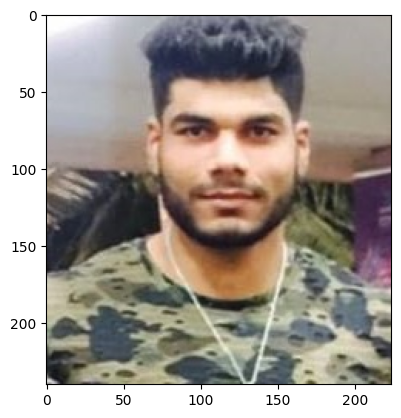

In [15]:
img = mpimg.imread("/content/data/without_mask/without_mask_1054.jpg")
imgplot = plt.imshow(img)
plt.show()

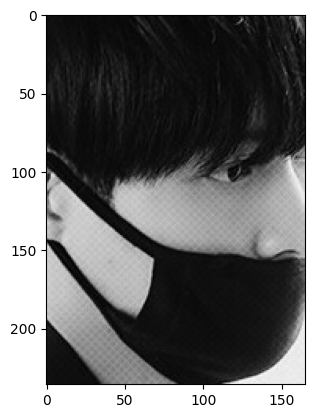

In [16]:
img = mpimg.imread("/content/data/with_mask/with_mask_1003.jpg")
imgplot = plt.imshow(img)
plt.show()

In [17]:
# Resizing the images
# converting into numpy array

data = []

with_mask_path = "/content/data/with_mask/"

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

without_mask_path = "/content/data/without_mask/"

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
len(data)

7553

In [19]:
data[0].shape

(128, 128, 3)

In [20]:
## conerting to array

x = np.array(data)

y = np.array(labels)

In [21]:
print(x.shape)

print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [22]:
## train test split

x_train ,x_test ,y_train ,y_test = train_test_split(
                                                  x,
                                                  y,
                                                  test_size = 0.2,
                                                  random_state = 42
)

## Feature scaling on images

In [23]:
x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [24]:
x_train_scaled[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [25]:
## Building an architecture for CNN model

import tensorflow as tf
from tensorflow import keras



In [26]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size = (3,3),activation = "relu",input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64,kernel_size = (3,3),activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation = "relu"))

model.add(keras.layers.Dense(64,activation = "relu"))

model.add(keras.layers.Dense(1,activation = "sigmoid"))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [28]:
## compile the model

model.compile(
            optimizer = "adam",
            loss = "binary_crossentropy",
            metrics = ["accuracy"]
)

In [29]:
history = model.fit(
                  x_train_scaled,
                  y_train,
                  validation_split = 0.1,
                  epochs = 30
)

Epoch 1/30
170/170 [==============================] - 17s 22ms/step - loss: 0.3399 - accuracy: 0.8562 - val_loss: 0.2257 - val_accuracy: 0.9008
Epoch 2/30
170/170 [==============================] - 3s 17ms/step - loss: 0.2158 - accuracy: 0.9154 - val_loss: 0.2128 - val_accuracy: 0.9107
Epoch 3/30
170/170 [==============================] - 3s 19ms/step - loss: 0.1452 - accuracy: 0.9421 - val_loss: 0.2355 - val_accuracy: 0.9124
Epoch 4/30
170/170 [==============================] - 3s 18ms/step - loss: 0.0916 - accuracy: 0.9652 - val_loss: 0.2042 - val_accuracy: 0.9107
Epoch 5/30
170/170 [==============================] - 3s 17ms/step - loss: 0.0645 - accuracy: 0.9783 - val_loss: 0.2503 - val_accuracy: 0.9207
Epoch 6/30
170/170 [==============================] - 3s 17ms/step - loss: 0.0515 - accuracy: 0.9825 - val_loss: 0.3685 - val_accuracy: 0.8942
Epoch 7/30
170/170 [==============================] - 3s 18ms/step - loss: 0.0378 - accuracy: 0.9875 - val_loss: 0.3115 - val_accuracy: 0.920

In [30]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)

48/48 [==============================] - 1s 17ms/step - loss: 0.4741 - accuracy: 0.9411


In [31]:
print(loss,accuracy)

0.47413894534111023 0.9410986304283142


In [32]:
def ploting(history,keyword):

  plt.plot(history.history[keyword])
  plt.plot(history.history["val_"+keyword])

  plt.title("model "+keyword)
  plt.ylabel(keyword)
  plt.xlabel("epochs")

  plt.legend(["Training data","Testing data"])

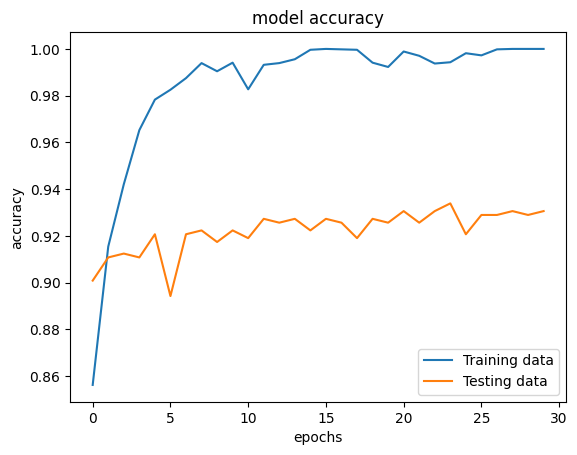

In [34]:
ploting(history,"accuracy")

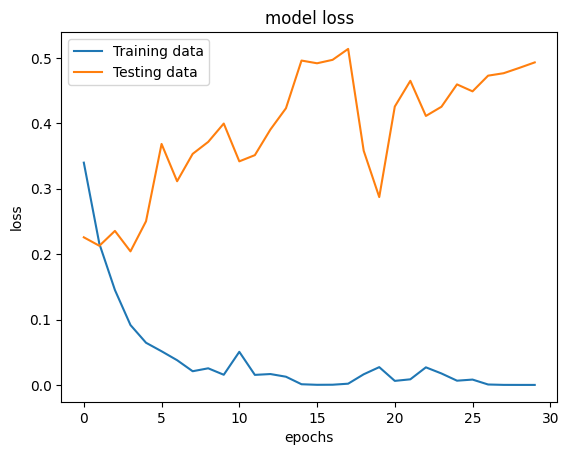

In [35]:
ploting(history,"loss")